<a href="https://colab.research.google.com/github/MarouaneAyech/IA_24_25/blob/main/tp_data_comprehension_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Understanding**

## Analyse des données

1.Se connecter au Drive Google et vérifier que le ficheri synthetic_housing_dataset.csv existe

2.Charger le dataset et examiner les premières lignes.

In [432]:
# Importer la bibliothèque pandas
# Elle permet de représenter les données tabulaires comme étant des dataframes
import pandas as pd

In [433]:
# Charger des données tabulaires (fichier CSV) sous la forme d'un dataframe
data_path='/content/drive/MyDrive/AI_24_25/synthetic_housing_dataset.csv'
data=pd.read_csv(data_path)

In [434]:
# Afficher les 5 premières lignes de dataframe
data.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city,price
0,10000.000000,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,Paris,629535.486411
1,0.000000,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,Lyon,682734.110117
2,-50.000000,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,Lyon,705054.855203
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,Marseille,550261.271344
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,Toulouse,510619.235213


3.Analyser les dimensions du dataset, les types de données ainsi que les statistiques descriptives

In [435]:
# Afficher les dimensions des données
print(data.shape)

(100, 9)


In [436]:
# Afficher les types de données
print(data.dtypes)

size_m2                    float64
num_bedrooms               float64
num_bathrooms              float64
distance_school            float64
public_transport_access    float64
property_tax               float64
date_built                  object
city                        object
price                      float64
dtype: object


In [437]:
# Afficher les statistiques descriptives des variables numériques (continues)
import numpy as np
print(data.describe(include=[np.number]))

            size_m2  num_bedrooms  num_bathrooms  distance_school  \
count    100.000000     95.000000     100.000000       100.000000   
mean     239.304605      2.911012       2.081660         4.712559   
std      987.255056      0.955481       0.722163         2.897322   
min      -50.000000      0.518600       0.075309         0.145447   
25%      117.346484      2.345428       1.613437         2.028225   
50%      139.866728      2.791213       2.111695         4.599573   
75%      168.257576      3.438545       2.543021         6.938161   
max    10000.000000      5.522306       3.652681         9.997177   

       public_transport_access  property_tax          price  
count                97.000000    100.000000     100.000000  
mean                  4.637516    955.294858  552958.490913  
std                   3.066544    803.084281  145741.541880  
min                  -0.199299   -963.865284  126877.612975  
25%                   2.278455    469.459761  471887.796953  
50%   

In [438]:
# Afficher les statistiques descriptives des variables discrètes (catégorielles)
print(data.describe(exclude=[np.number]))

        date_built  city
count          100   100
unique          50     4
top     2014-01-01  Lyon
freq             5    33


## Identification des problèmes

### Vérifier les valeurs manquantes

In [439]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

size_m2                    0
num_bedrooms               5
num_bathrooms              0
distance_school            0
public_transport_access    3
property_tax               0
date_built                 0
city                       0
price                      0
dtype: int64


### Identifier valeurs aberrantes



- <font color=red>Technique de l'écart interquartile (IQR) ou (Interquartile Range)</font>

      IQR permet d'identifier les points/valeurs qui sont en dehors de la plage normale des données.

      Calcul de l'IQR :
      - Q1 (premier quartile) : 25e percentile
      - Q3 (troisième quartile) : 75e percentile
      - IQR = Q3 - Q1

      Les outliers ou valeurs aberrantes sont toute valeur en dehors de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

In [440]:
# Calculer les quartiles et l'IQR
Q1 = data['size_m2'].quantile(0.25)
Q1

117.34648419848337

In [441]:
Q3 = data['size_m2'].quantile(0.75)
Q3

168.25757616860716

In [442]:
IQR = Q3 - Q1
IQR

50.91109197012379

In [443]:
# Définir les limites/moustaches (lower_bound,upper_bound)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower_bound=',lower_bound)
print('upper_bound=',upper_bound)

lower_bound= 40.97984624329767
upper_bound= 244.62421412379285


In [444]:
# Détecter les outliers
outliers = data[(data['size_m2'] < lower_bound) | (data['size_m2'] > upper_bound)]

print("Valeurs aberrantes détectées :")
print(outliers[['size_m2']])

Valeurs aberrantes détectées :
         size_m2
0   10000.000000
1       0.000000
2     -50.000000
74     19.012745


  - <font color=red>Boxplot :</font>

        L'outil boxplot permet d'identifier visuellement les outliers (valeurs aberrantes) (la fonction sns.boxplot()).
        
        Il visualise :

         - Boite (Box) :
            - limite inf est premier quartile (Q1)
            - limite sup est 3eme quartile (Q3)
            - ligne intérieure est 2eme quartile ou mediane (Q2)

         - Moustaches (whiskers) ou (Interquartile Range)
            - Un moustache inf au niveau de -1.5 fois l'IQR
            - Un moustache sup au niveau de +1.5 fois l'IQR

        Les outliers ou valeurs aberrantes sont les valeurs qui se trouvent en dehors des moustaches.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


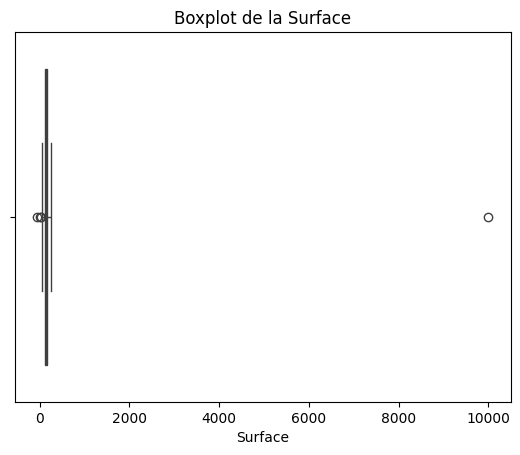

In [445]:
# Identifier les valeurs aberrantes à l'aide d'un boxplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['size_m2'])
plt.title('Boxplot de la Surface')
plt.xlabel('Surface')
plt.show()

# **Data Processing**

## Data Cleaning

### Traitement des valeurs manquantes

In [446]:
# Remplacer les valeurs manquantes par les moyennes des colonnes
data.fillna({'num_bedrooms':data.num_bedrooms.mean(),
             'public_transport_access':data.public_transport_access.mean()},
            inplace=True)

In [447]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

size_m2                    0
num_bedrooms               0
num_bathrooms              0
distance_school            0
public_transport_access    0
property_tax               0
date_built                 0
city                       0
price                      0
dtype: int64


### Traitement des valeurs aberrantes

In [448]:
import numpy as np

# Calculer la médiane de la colonne la colonne size_m2
median_value = data['size_m2'].median()

# Remplacer les outliers par la mediane dans la colonne size_m2
data['size_m2'] = np.where((data['size_m2'] < lower_bound) | (data['size_m2'] > upper_bound),
                           median_value,
                           data['size_m2'])

print("Données après correction des valeurs aberrantes :")
print(data[['size_m2']].head())

Données après correction des valeurs aberrantes :
      size_m2
0  139.866728
1  139.866728
2  139.866728
3  226.151493
4  138.292331


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


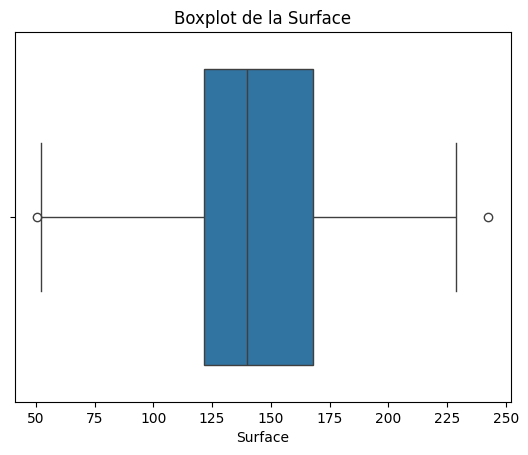

In [449]:
# Utiliser Boxplotpour vérifier les valeurs aberrantes ont été traitées

sns.boxplot(x=data['size_m2'])
plt.title('Boxplot de la Surface')
plt.xlabel('Surface')
plt.show()

## Data Transformation

### Division du dataset en features (X) et cible (y)

In [450]:
X=data.drop('price',axis=1)
y=data['price']

In [451]:
X.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city
0,139.866728,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,Paris
1,139.866728,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,Lyon
2,139.866728,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,Lyon
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,Marseille
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,Toulouse


In [452]:
y.head()

,price
0,629535.486411
1,682734.110117
2,705054.855203
3,550261.271344
4,510619.235213


### Encodage des variables catégorielles

In [453]:
# La colonne 'city' avant son encodage (Catégorielle)
X['city'].head()

,city
0,Paris
1,Lyon
2,Lyon
3,Marseille
4,Toulouse


In [454]:
# Count des valeurs possibles dans 'city'
X['city'].value_counts()

,count
city,
Lyon,33
Paris,29
Toulouse,20
Marseille,18


In [455]:
# Encodage de la colonne 'city' en utilisant OneHotEncoder

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Instancier l'objet OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Ajuster et transformer la variable 'city'
city_encoded = encoder.fit_transform(X[['city']])

# Créer un DataFrame à partir des données encodées
city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['city']))

In [456]:
# Afficher l'encodage de la colonne 'city'
city_encoded_df.head()

,city_Lyon,city_Marseille,city_Paris,city_Toulouse
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [457]:
# Concaténer le DataFrame original avec les données encodées
X = pd.concat([X.drop('city', axis=1), city_encoded_df], axis=1)
X.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city_Lyon,city_Marseille,city_Paris,city_Toulouse
0,139.866728,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,0.0,0.0,1.0,0.0
1,139.866728,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,1.0,0.0,0.0,0.0
2,139.866728,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,1.0,0.0,0.0,0.0
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,0.0,1.0,0.0,0.0
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,0.0,0.0,0.0,1.0


### Transformations des dates

In [458]:
# vérifier que la colonne 'date_built' n'a pas le type 'datetime' !
X.dtypes

,0
size_m2,float64
num_bedrooms,float64
num_bathrooms,float64
distance_school,float64
public_transport_access,float64
property_tax,float64
date_built,object
city_Lyon,float64
city_Marseille,float64
city_Paris,float64


In [459]:
# Imposer le type datetime à la colonne 'date_built'
X['date_built'] = pd.to_datetime(X['date_built'])

X.dtypes

,0
size_m2,float64
num_bedrooms,float64
num_bathrooms,float64
distance_school,float64
public_transport_access,float64
property_tax,float64
date_built,datetime64[ns]
city_Lyon,float64
city_Marseille,float64
city_Paris,float64


In [460]:
X['year_built']=X['date_built'].dt.year
X.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,date_built,city_Lyon,city_Marseille,city_Paris,city_Toulouse,year_built
0,139.866728,2.789029,2.569210,4.148195,5.793163,1244.341795,1988-01-01,0.0,0.0,1.0,0.0,1988
1,139.866728,2.651413,2.156254,2.734071,2.485035,-558.753511,2014-01-01,1.0,0.0,0.0,0.0,2014
2,139.866728,3.476331,2.822102,0.563755,1.140312,230.558272,1998-01-01,1.0,0.0,0.0,0.0,1998
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,1962-01-01,0.0,1.0,0.0,0.0,1962
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,1991-01-01,0.0,0.0,0.0,1.0,1991


In [461]:
# Supprimer la colonne de la date
X.drop('date_built', axis=1, errors='ignore', inplace=True)
X.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,city_Lyon,city_Marseille,city_Paris,city_Toulouse,year_built
0,139.866728,2.789029,2.569210,4.148195,5.793163,1244.341795,0.0,0.0,1.0,0.0,1988
1,139.866728,2.651413,2.156254,2.734071,2.485035,-558.753511,1.0,0.0,0.0,0.0,2014
2,139.866728,3.476331,2.822102,0.563755,1.140312,230.558272,1.0,0.0,0.0,0.0,1998
3,226.151493,4.121891,3.441496,8.647224,8.958474,2114.877349,0.0,1.0,0.0,0.0,1962
4,138.292331,2.685204,1.700071,8.129010,11.207891,886.508895,0.0,0.0,0.0,1.0,1991


### Normalisation des données à échelle différente

In [462]:
# Analyser les variances desz features
X.var().sort_values(ascending=False)

,0
property_tax,644944.363104
size_m2,1879.505673
year_built,331.681919
public_transport_access,9.118730
distance_school,8.394473
num_bedrooms,0.866837
num_bathrooms,0.521520
city_Lyon,0.223333
city_Paris,0.207980
city_Toulouse,0.161616


In [463]:
# Normaliser les features avec Standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,size_m2,num_bedrooms,num_bathrooms,distance_school,public_transport_access,property_tax,city_Lyon,city_Marseille,city_Paris,city_Toulouse,year_built
0,-0.123851,-0.131678,0.678526,-0.195770,0.384627,0.361734,-0.701810,-0.468521,1.564697,-0.5,-0.078915
1,-0.123851,-0.280231,0.103812,-0.686308,-0.716398,-1.894790,1.424887,-0.468521,-0.639101,-0.5,1.355897
2,-0.123851,0.610250,1.030476,-1.439159,-1.163955,-0.906988,1.424887,-0.468521,-0.639101,-0.5,0.472936
3,1.876447,1.307117,1.892489,1.364877,1.438120,1.451185,-0.701810,2.134375,-0.639101,-0.5,-1.513726
4,-0.160349,-0.243755,-0.531060,1.185116,2.186781,-0.086084,-0.701810,-0.468521,-0.639101,2.0,0.086641


In [464]:
# Analyser les variances normalisées
X.var().sort_values(ascending=False)

,0
public_transport_access,1.010101
size_m2,1.010101
city_Toulouse,1.010101
year_built,1.010101
num_bedrooms,1.010101
distance_school,1.010101
property_tax,1.010101
city_Marseille,1.010101
num_bathrooms,1.010101
city_Lyon,1.010101


## Data Optimization

### Sélection des caractéristiques

Calculer la matrice de corrélation entre toutes les variables (features + cible)

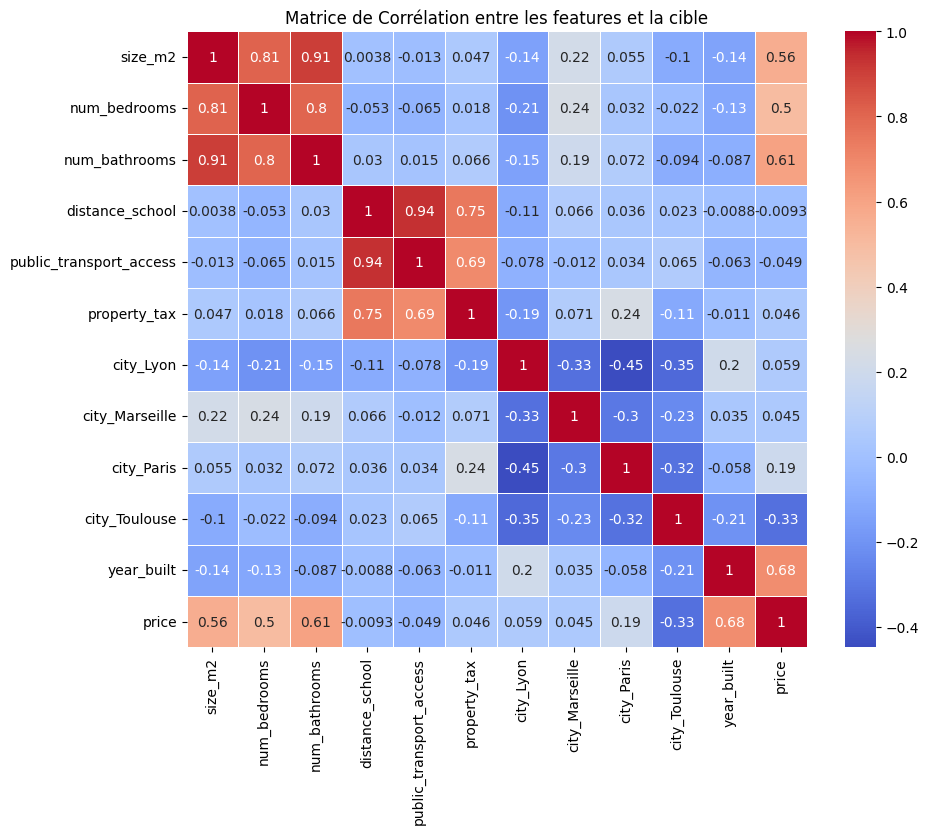

In [465]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concaténer les features avec la cible dans un seul dataframe data
data = pd.concat([X , y], axis=1)

# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure si nécessaire
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Affichage de la heatmap
plt.title('Matrice de Corrélation entre les features et la cible')
plt.show()

In [469]:
correlations_cible=corr_matrix['price'].abs().sort_values(ascending=False)[1::]
correlations_cible

,price
year_built,0.678184
num_bathrooms,0.605889
size_m2,0.562813
num_bedrooms,0.499038
city_Toulouse,0.326042
city_Paris,0.188051
city_Lyon,0.059251
public_transport_access,0.049190
property_tax,0.045945
city_Marseille,0.044837


In [470]:
correlated_features=correlations_cible[correlations_cible>0.1].index.tolist()
correlated_features

['year_built',
 'num_bathrooms',
 'size_m2',
 'num_bedrooms',
 'city_Toulouse',
 'city_Paris']

In [471]:
# Filtrer le dataset pour garder les caractéristiques pertinentes
X = X[correlated_features]
X.head()

,year_built,num_bathrooms,size_m2,num_bedrooms,city_Toulouse,city_Paris
0,-0.078915,0.678526,-0.123851,-0.131678,-0.5,1.564697
1,1.355897,0.103812,-0.123851,-0.280231,-0.5,-0.639101
2,0.472936,1.030476,-0.123851,0.610250,-0.5,-0.639101
3,-1.513726,1.892489,1.876447,1.307117,-0.5,-0.639101
4,0.086641,-0.531060,-0.160349,-0.243755,2.0,-0.639101


### Analyse en COmposantes principales (ACP)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = X.corr()

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure si nécessaire
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Affichage de la heatmap
plt.title('Matrice de Corrélation entre les features')
plt.show()

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(X)
# data_reduced = pca.transform(data)
# data_reduced[:5,:]

In [ ]:
# pca.explained_variance_ratio_

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [ ]:
X[:5,:]

In [ ]:
# Calcul de la matrice de corrélation
corr_matrix = pd.DataFrame(X).corr()

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure si nécessaire
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Affichage de la heatmap
plt.title('Matrice de Corrélation entre les features générées par ACP')
plt.show()

# Visualisation

In [ ]:
data_path='/content/drive/MyDrive/AI_24_25/synthetic_housing_dataset.csv'
data=pd.read_csv(data_path)

price=data['price']
price.hist(bins=50)

In [ ]:
price.plot(kind='density')

In [ ]:
price_high=data_reduced[price>price.mean()]
price_low=data_reduced[price<=price.mean()]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(price_high[:,0],price_high[:,1],'r+')
plt.plot(price_low[:,0],price_low[:,1],'b+')
plt.show()